In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [26]:
data = pd.read_csv('sprinkler_dataset.csv')
data


,Temperature,Humidity,Sprinkler_Duration
0,37.333173,55.958239,43.397338
1,41.083352,79.390758,61.881374
2,26.193361,39.168529,46.917671
3,41.279896,48.135288,38.182394
4,38.303768,76.559453,51.315277
...,...,...,...
995,41.885368,59.392376,45.238663
996,33.098216,63.430550,36.124308
997,23.581809,63.030554,35.496480
998,23.233847,60.926551,34.109839


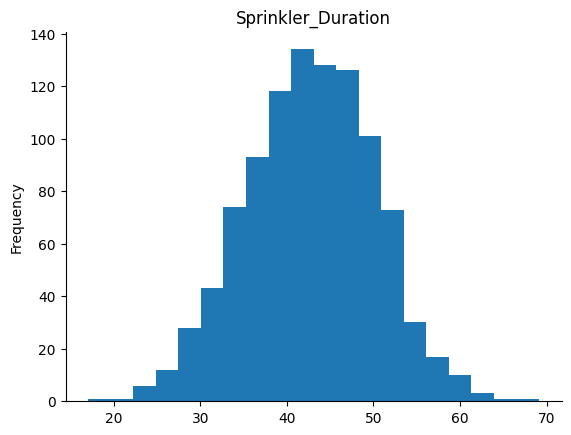

In [27]:
from matplotlib import pyplot as plt
data['Sprinkler_Duration'].plot(kind='hist', bins=20, title='Sprinkler_Duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

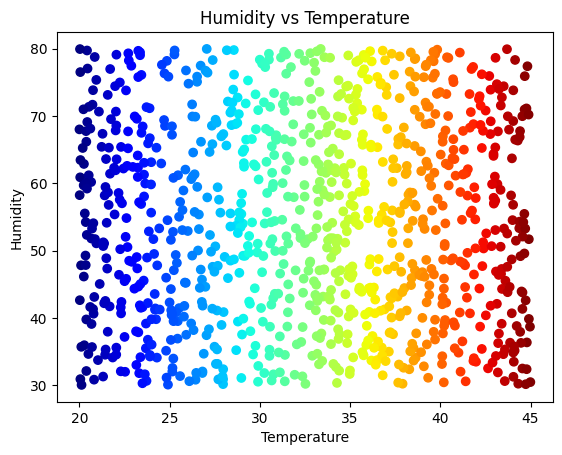

In [24]:
# @title Humidity vs Temperature

import matplotlib.pyplot as plt
plt.scatter(data['Temperature'], data['Humidity'], c=data['Temperature'], cmap='jet')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
_ = plt.title('Humidity vs Temperature')

In [ ]:
# X = data[["Temperature", "Humidity"]]  # Features
# X.columns = ["Temperature", "Humidity"]  # Assign feature names
# y = data["Sprinkler_Duration"]  # Target variable

In [14]:
X = data.drop('Sprinkler_Duration',axis=1)
y = data['Sprinkler_Duration']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Model

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

In [17]:
mse = mean_squared_error(y_test, y_predicted)
print("Mean Squared Error:", mse)

Mean Squared Error: 22.705378426579088


Testing with user input

In [9]:
# Assigning feature names to the new data for prediction
new_data = pd.DataFrame([[21, 80]], columns=["Temperature", "Humidity"])

In [10]:
predicted_time = model.predict(new_data)
print("Predicted running time for 21 degrees Celsius and 80 % humidity:", predicted_time[0])

Predicted running time for 21 degrees Celsius and 80 % humidity: 44.63497561061205


In [18]:
import pickle
pickle.dump(model, open('sprink.pkl', 'wb'))

In [19]:
pickled_model = pickle.load(open('sprink.pkl', 'rb'))
pickle_pred =pickled_model.predict(X_test)

In [20]:
pickle_pred

array([29.4406298 , 39.14806054, 44.57748126, 41.22992174, 39.62308975,
       40.76490073, 48.76426109, 40.72952199, 49.32099032, 48.38586899,
       52.35524899, 44.75160312, 43.81405388, 45.1612493 , 44.69404741,
       39.69684687, 43.94467075, 47.32616228, 32.60930695, 45.58636935,
       32.80335516, 45.01653997, 40.55755608, 49.07371102, 40.0750385 ,
       41.25730403, 43.98227748, 49.48512995, 47.5491158 , 47.59947657,
       43.18746267, 40.59379429, 40.09991827, 51.88687926, 38.00247843,
       50.79611897, 37.29238347, 43.05657931, 31.0008692 , 44.09673713,
       44.31808574, 50.56409595, 50.18180727, 41.74592743, 42.59123251,
       49.33866218, 48.51798486, 50.16310064, 44.81371407, 43.15608634,
       52.10915853, 43.69476613, 45.67448565, 43.84922243, 48.18008106,
       46.2196369 , 52.59415648, 46.10670552, 52.92518695, 53.27024144,
       55.26005522, 45.43936826, 41.68678609, 43.07027457, 47.80465447,
       48.68325326, 45.75000694, 36.45901278, 46.0051677 , 39.09

In [23]:
acc = mean_squared_error(y_test, pickle_pred)
print("pickle model accuracy:", acc)

pickle model accuracy: 22.705378426579088


In [11]:
# import pickle

# # Assuming you have a trained model stored in a variable named 'model'
# # Replace 'model' with the name of your actual model variable

# # Save the model to a .pkl file
# with open('model.pkl', 'wb') as file:
#     pickle.dump(model, file)
